## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [2]:
sns.set_theme()

## Reading data

In [3]:
raw_movielens_folder = "./../data/interim/ml-100k"

In [4]:
genres = ["unknown",
"Action",
"Adventure",
"Animation",
"Children",
"Comedy",
"Crime",
"Documentary",
"Drama",
"Fantasy",
"Film-Noir",
"Horror",
"Musical",
"Mystery",
"Romance",
"Sci-Fi",
"Thriller",
"War",
"Western"
]

In [5]:
df_ratings = pd.read_csv(raw_movielens_folder+"/u.data", sep = "\t", header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'], index_col = 0)
df_users = pd.read_csv(raw_movielens_folder+"/u.user", sep='|', header=None, names=['user_id', 'age', 'gender', 'occupation', 'zipcode'], index_col=0)

# in interim this file has replaces || by |
df_movies = pd.read_csv(raw_movielens_folder+"/u.item", sep='|', header=None, names = ["movie_id", "name", "date", "link"] + genres, encoding='latin-1', index_col=0)
df_movies.drop(["link"], axis=1, inplace=True) # useless

## Users file analysis

In [54]:
df_users.head(1)

,age,gender,occupation,zipcode
user_id,,,,
1,24,M,technician,85711


In [58]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zipcode     943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


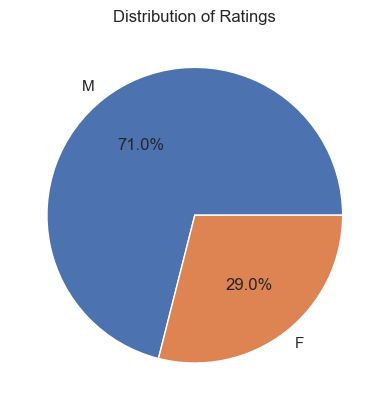

In [7]:
rating_counts = df_users['gender'].value_counts()
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

In [65]:
f"{df_users.zipcode.nunique()} unique zipcodes out of 943 values"

'795 unique zipcodes out of 943 values'

Text(0.5, 1.0, 'age distribution')

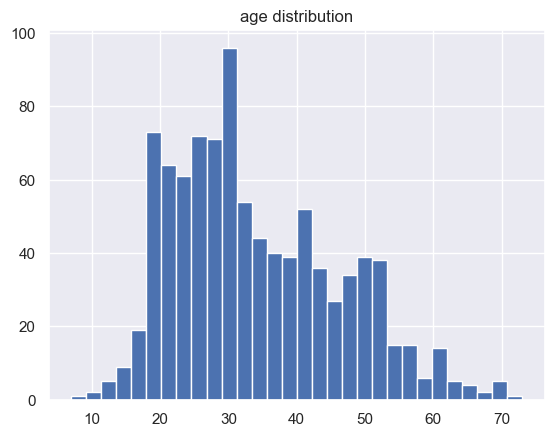

In [7]:
plt.hist(df_users.age, bins = 30)
print()
plt.title("age distribution")

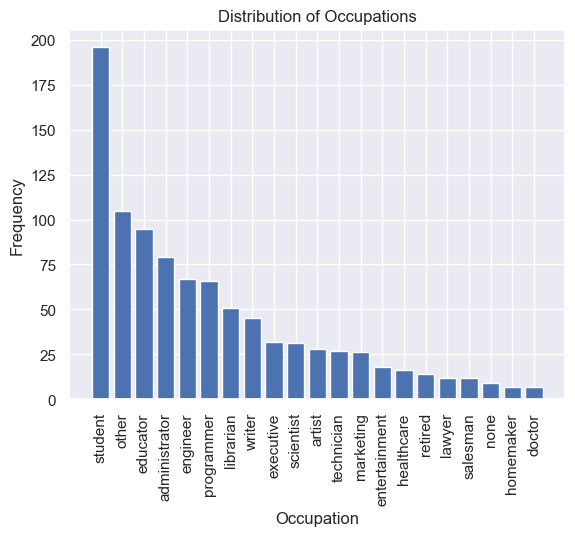

In [19]:
occupation_counts = df_users['occupation'].value_counts()

plt.bar(occupation_counts.index, occupation_counts.values)
plt.title('Distribution of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## Movies file analysis

In [103]:
df_movies.tail(1)

,name,date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [104]:
df_movies['release_year'] = df_movies.name.str.extract("\((\d{4})\)", expand=False).astype(str)

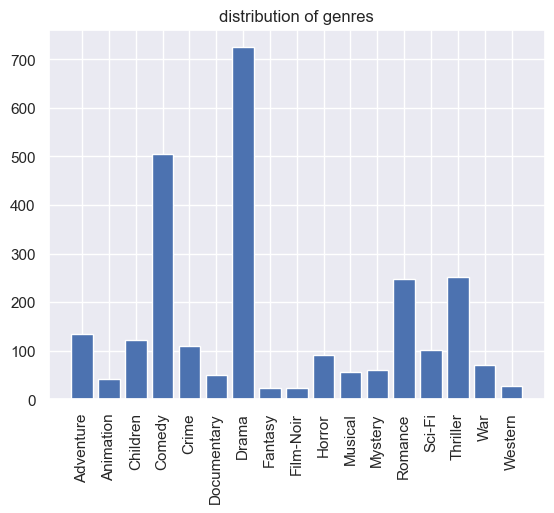

In [126]:
plt.bar(df_movies[df_movies.columns[3:-1]].sum().index, df_movies[df_movies.columns[3:-1]].sum())
plt.xticks(rotation=90)
plt.title("distribution of genres")
print()

In [134]:
df_movies["date"] = df_movies["date"].astype("datetime64[ns]")

Text(0.5, 1.0, 'video release year distribution')

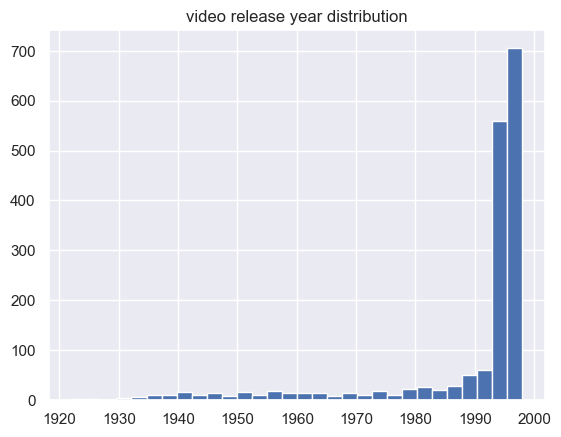

In [142]:
df_movies["date"].dt.year.hist( bins = 30)
plt.title("video release year distribution")

## Ratings file analysis

In [143]:
df_ratings.head()

,movie_id,rating,timestamp
user_id,,,
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596


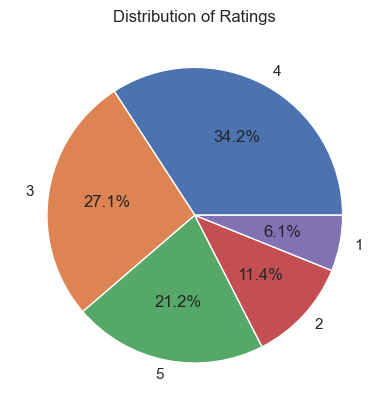

In [6]:
rating_counts = df_ratings['rating'].value_counts()
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

In [11]:
sorted(df_ratings["rating"].unique())

[1, 2, 3, 4, 5]

In [160]:
df_ratings["timestamp"] = pd.to_datetime(df_ratings["timestamp"], unit="s")

In [164]:
#how many ratings per year
df_ratings["timestamp"].dt.year.value_counts()

timestamp
1997    52899
1998    47101
Name: count, dtype: int64